In [ ]:
#Configuracion inicial
%matplotlib inline
import matplotlib.pyplot as plt #librería para graficas de python
import numpy as np # extiende las librerias de matemática de python
import pandas as pd #libreria para procesamiento de datos muy usada en la industria
import seaborn as sb # Extiende las funcionalidades de matplotlib, muy usado en data visualization

# Con esto hacemos los gráficos más grandes, adecuados para el proyector.
sb.set_context(context='talk', font_scale=1.2)

In [ ]:
from google.colab import drive

#drive.mount('/content/drive')
#drive.flush_and_unmount()

In [ ]:
#Podemos importar archivos a nuestro notebook con este snippet 
from google.colab import files  

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving caso2_noAlg.csv to caso2_noAlg (2).csv
User uploaded file "caso2_noAlg.csv" with length 1239 bytes


In [ ]:
# Podemos usar comandos de bash con el %

In [10]:
# Cambiar la dirección del conjunto de datos de acuerdo a dónde lo guardaron
#li = [1]
#r = [i for i in range(max(li)) if i not in li]
data = pd.read_csv("caso2_noAlg.csv")

# Veamos los datos en forma de tabla, e identificamos la fila y columna en donde estan mis datos de interés
data

,file 256483 1653586894
0,version 2
1,run General-0-20220526-14:41:32-10236
2,attr configname General
3,attr datetime 20220526-14:41:32
4,attr experiment General
5,attr inifile omnetpp.ini
6,"attr iterationvars """""
7,"attr iterationvarsf """""
8,"attr measurement """""
9,attr network Network


In [ ]:
# Sin Alg
rowHop = 25
rowDelay = 24
rowBuffer = 17
nBuffer = 7

#Omnet guarda los valores de nuestro "vector" (lista de valores) en una celda, por lo que tengo que esxtraer estos valores
timeHopCount       = data['vectime'].loc[[rowHop]].tolist()
valuehopCount      = data['vecvalue'].loc[[rowHop]].tolist()
timeDelay = data['vectime'].loc[[rowDelay]].tolist()
valueDelay = data['vecvalue'].loc[[rowDelay]].tolist()

timeBufferSize = []
valueBufferSize = []
# Buffers malos (desacomodados)
"""
timeBufferSize.append(data['vectime'].loc[[17]].tolist())
valueBufferSize.append(data['vecvalue'].loc[[17]].tolist())
timeBufferSize.append(data['vectime'].loc[[18]].tolist())
valueBufferSize.append(data['vecvalue'].loc[[18]].tolist())
timeBufferSize.append(data['vectime'].loc[[22]].tolist())
valueBufferSize.append(data['vecvalue'].loc[[22]].tolist())
timeBufferSize.append(data['vectime'].loc[[23]].tolist())
valueBufferSize.append(data['vecvalue'].loc[[23]].tolist())
timeBufferSize.append(data['vectime'].loc[[24]].tolist())
valueBufferSize.append(data['vecvalue'].loc[[24]].tolist())
timeBufferSize.append(data['vectime'].loc[[25]].tolist())
valueBufferSize.append(data['vecvalue'].loc[[25]].tolist())
timeBufferSize.append(data['vectime'].loc[[26]].tolist())
valueBufferSize.append(data['vecvalue'].loc[[26]].tolist())
"""

for idx in range(0,nBuffer):
    timeBufferSize.append(data['vectime'].loc[[rowBuffer+idx]].tolist())
    valueBufferSize.append(data['vecvalue'].loc[[rowBuffer+idx]].tolist())



# Los valores que sacamos estan como un solostring separados por comas por lo 
# que tengo que convertirlos a listas para poder graficarlos
timeHopCount       = list(map(float,timeHopCount[0].split()))
valueHopCount      = list(map(float,valuehopCount[0].split()))
timeDelay              = list(map(float,timeDelay[0].split()))
valueDelay             = list(map(float,valueDelay[0].split()))


for idx in range(0,nBuffer):
    timeBufferSize[idx] = list(map(float,timeBufferSize[idx][0].split()))
    valueBufferSize[idx] = list(map(float,valueBufferSize[idx][0].split()))



min = 0
index = 0 # indice del bufferSize con mas carga
for idx in range (0,nBuffer):
    if sum(valueBufferSize[idx]) > min:
        min = sum(valueBufferSize[idx])
        index = idx




KeyError: ignored

<function matplotlib.pyplot.show>

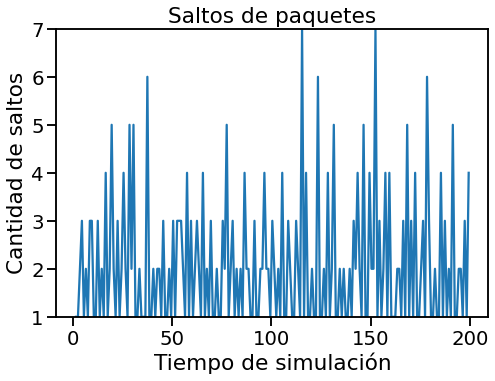

In [ ]:
fig = plt.figure()
a1 = fig.add_axes([0,0,1,1])
a1.set_ylim(1,7)

plt.plot(timeHopCount, valueHopCount, color='tab:blue')
plt.title('Saltos de paquetes')
plt.xlabel("Tiempo de simulación")
plt.ylabel("Cantidad de saltos")

plt.show

<function matplotlib.pyplot.show>

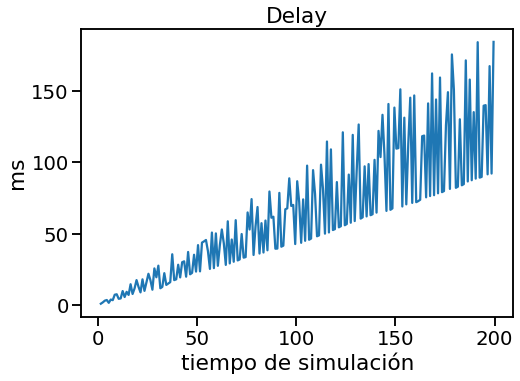

In [ ]:
fig = plt.figure()
a1 = fig.add_axes([0,0,1,1])
plt.plot(timeDelay, valueDelay, color='tab:blue')
plt.title('Delay')
plt.xlabel("tiempo de simulación")
plt.ylabel("ms")
plt.show

<function matplotlib.pyplot.show>

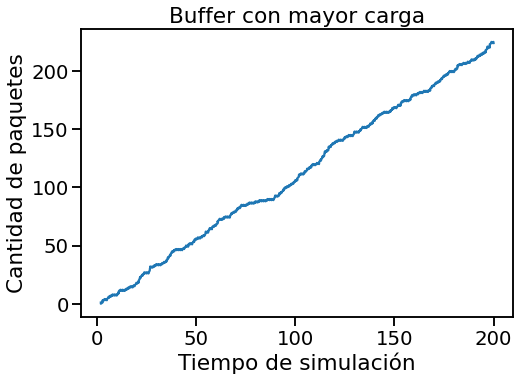

In [ ]:
fig = plt.figure()
a1 = fig.add_axes([0,0,1,1])
a1.plot(timeBufferSize[index], valueBufferSize[index], color='tab:blue')

plt.title("Buffer con mayor carga")
plt.xlabel("Tiempo de simulación")
plt.ylabel("Cantidad de paquetes")

plt.show